In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import boto3
import io

In [180]:
conn = boto3.client('s3')
s3 = boto3.resource('s3')

In [181]:
bslsvy = []
bdsvy = []
for item in conn.list_objects(Bucket='aads-tagyourmeal')['Contents']:
    filename = item['Key']
    if 'baseline' in filename:
#         print(filename)
        obj = conn.get_object(Bucket='aads-tagyourmeal',Key=filename)
        item = pd.read_json(obj['Body'],typ='series')
        bslsvy.append(item)
    if 'burden' in filename:
#         print(filename)
        obj = conn.get_object(Bucket='aads-tagyourmeal',Key=filename)
        item = pd.read_json(obj['Body'],typ='series')
        bdsvy.append(item)
bslsvy_df = pd.DataFrame(bslsvy)
bdsvy_df = pd.DataFrame(bdsvy, dtype=int)
        

In [182]:
csv_buffer = io.StringIO()
bslsvy_df.to_csv(csv_buffer, index=False)
s3.Object('aads-poc-analytics-datasets','bslsvy.csv').put(Body=csv_buffer.getvalue())
csv_buffer = io.StringIO()
bdsvy_df.to_csv(csv_buffer, index=False)
s3.Object('aads-poc-analytics-datasets','bdsvy.csv').put(Body=csv_buffer.getvalue())

{'ResponseMetadata': {'RequestId': '8B31208822DC0B64',
  'HostId': 'a+3Pdr1ECqwTpK4lPj9oYH+D4TJ4npimnk0Mmg2JF0xiJUUYhbbZjQkGiYMmjq1uQixsIjY0Mw4=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'a+3Pdr1ECqwTpK4lPj9oYH+D4TJ4npimnk0Mmg2JF0xiJUUYhbbZjQkGiYMmjq1uQixsIjY0Mw4=',
   'x-amz-request-id': '8B31208822DC0B64',
   'date': 'Sun, 24 Feb 2019 05:07:37 GMT',
   'etag': '"795ab12af1aef97a936a56f5a2e4bdcf"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"795ab12af1aef97a936a56f5a2e4bdcf"'}

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


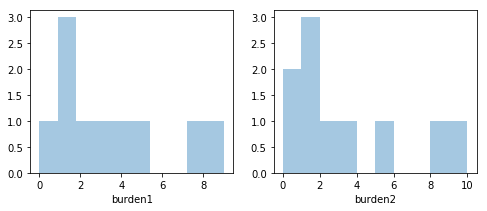

In [183]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(8,3))

sns.distplot(bdsvy_df.burden1, ax=ax1, bins=10, kde=False, rug=False)
sns.distplot(bdsvy_df.burden2, ax=ax2, bins=10, kde=False, rug=False)

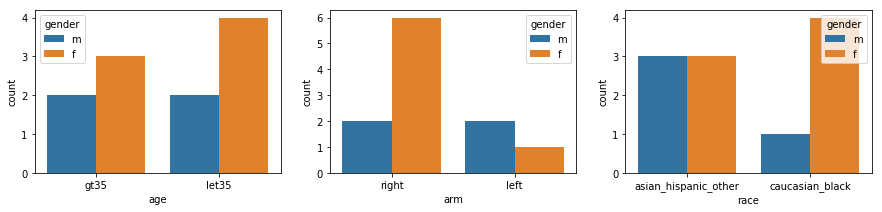

In [184]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(15,3))

sns.countplot(x="age", hue="gender", data=bslsvy_df, ax=ax1)
sns.countplot(x="arm", hue="gender", data=bslsvy_df, ax=ax2)
sns.countplot(x="race", hue="gender", data=bslsvy_df, ax=ax3)

In [190]:
!git commit -m "survey pull"

On branch master
Your branch is up-to-date with 'origin/master'.

Changes not staged for commit:
	modified:   survey_data_lookup.ipynb

no changes added to commit


In [192]:
!git status

On branch master
Your branch is up-to-date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   survey_data_lookup.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [193]:
!git push

Everything up-to-date


In [185]:
for object in bucket.objects.all():
    print(object)

s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-23 20:40:55 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-23 20:52:39 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-24 02:28:35 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-24 02:36:55 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-24 02:51:17 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-24 03:06:39 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-24 03:50:18 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_event_2019-02-24 03:51:17 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_motiondata_2019-02-23 20:40:55 +0000.txt')
s3.ObjectSummary(bucket_name='aads-tagyourmeal', key='TestUser_motiondata_2019-02-23 2